In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [5]:
df = pd.read_csv('data/Top_Anime_data 2.csv')

In [ ]:
#Learning from Dataset

In [6]:
df.shape

(1000, 22)

In [7]:
nan_count = df.isna().sum()
print(nan_count)

Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         0
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

In [9]:
df.duplicated().values.any()

False

In [ ]:
#Cleaning data

In [10]:
df["English"].fillna(df.Japanese, inplace = True)
df["Genres"].fillna(df.Demographic, inplace = True)

In [11]:
df["Episodes"].replace('Unknown', '0', inplace = True)

In [12]:
df = df.drop(df.columns[[2,3,5,6,10,12,13,19,20]], axis=1) #we drop the columns we won't be using

In [13]:
df.head(20)

,Score,Popularity,Description,English,Type,Episodes,Aired,Producers,Licensors,Studios,Source,Genres,Rating
0,9.38,284,During their decade-long quest to defeat the D...,Frieren: Beyond Journey's End,TV,28,"Sep 29, 2023 to Mar 22, 2024","Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",PG-13 - Teens 13 or older
1,9.09,3,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",R - 17+ (violence & profanity)
2,9.07,13,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",PG-13 - Teens 13 or older
3,9.06,342,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama Season 4,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",PG-13 - Teens 13 or older
4,9.05,21,Seeking to restore humanity's diminishing hope...,Attack on Titan Season 3 Part 2,TV,10,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",R - 17+ (violence & profanity)
5,9.04,1532,Two years have passed following the Tendoshuu'...,Gintama: The Very Final,Movie,1,"Jan 8, 2021","TV Tokyo, Aniplex, Dentsu, Bandai, Warner Bros...",Eleven Arts,Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, DramaDrama, Sci-Fi...",PG-13 - Teens 13 or older
6,9.04,9,Hunters devote themselves to accomplishing haz...,Hunter x Hunter,TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, FantasyFantasy",PG-13 - Teens 13 or older
7,9.03,393,"After a one-year hiatus, Shinpachi Shimura ret...",Gintama Season 2,TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...","None found, add some",Sunrise,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",PG-13 - Teens 13 or older
8,9.02,411,Substitute Soul Reaper Ichigo Kurosaki spends ...,Bleach: Thousand-Year Blood War,TV,13,"Oct 11, 2022 to Dec 27, 2022","TV Tokyo, Aniplex, Dentsu, Shueisha",VIZ Media,Pierrot,Manga,"ActionAction, AdventureAdventure, FantasyFantasy",R - 17+ (violence & profanity)
9,9.02,746,The 150-year-long stalemate between the two in...,Legend of the Galactic Heroes,OVA,110,"Jan 8, 1988 to Mar 17, 1997","TV Tokyo, Kitty Films, Tokuma Shoten, Tokuma J...",Sentai Filmworks,"K-Factory, Kitty Film Mitaka Studio",Novel,"DramaDrama, Sci-FiSci-Fi",R - 17+ (violence & profanity)


In [14]:
df = df.dropna()

In [ ]:
#Preprocessing data

In [15]:
df["Aired"].head()

0    Sep 29, 2023 to Mar 22, 2024
1      Apr 5, 2009 to Jul 4, 2010
2     Apr 6, 2011 to Sep 14, 2011
3     Apr 8, 2015 to Mar 30, 2016
4     Apr 29, 2019 to Jul 1, 2019
Name: Aired, dtype: object

In [16]:
df['Aired'] = df['Aired'].str.split(',')
df['Year'] = df['Aired'].str[1]
df['Year'] = df['Year'].str.split('t').str[0].astype(int)


In [17]:
df.Episodes = df.Episodes.astype(int)

In [18]:
df.Year.head()

0    2023
1    2009
2    2011
3    2015
4    2019
Name: Year, dtype: int64

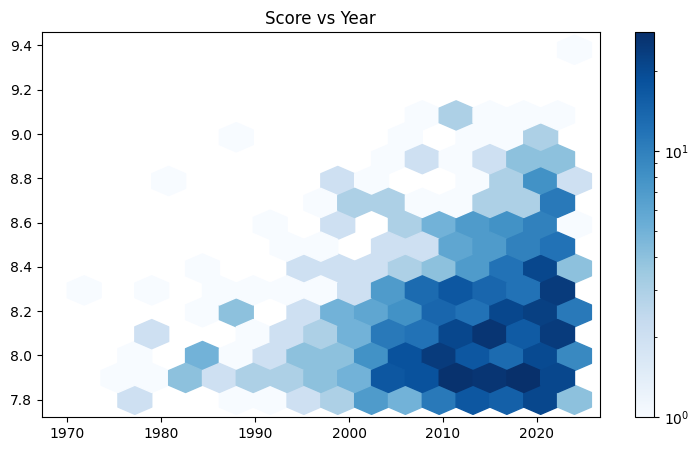

In [19]:
fig,(ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))

hb = ax1.hexbin(df["Year"], df["Score"], gridsize=15, bins='log', cmap='Blues')
ax1.set_title("Score vs Year")
cb = fig.colorbar(hb, ax=ax1)
fig.show()

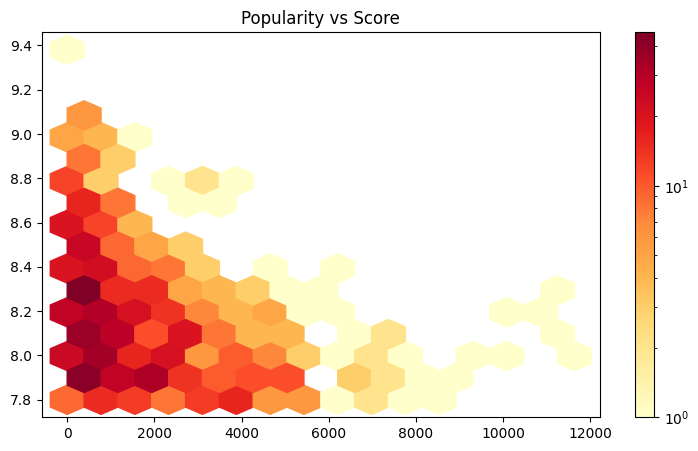

In [20]:
fig,(ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))

hb = ax1.hexbin(df["Popularity"], df["Score"], gridsize=15, bins='log', cmap='YlOrRd')
ax1.set_title("Popularity vs Score")
cb = fig.colorbar(hb, ax=ax1)
fig.show()

In [21]:
studiosCount = df['Studios'].value_counts()
display(studiosCount.head(20))

Studios
Madhouse             55
Production I.G       53
Sunrise              49
TMS Entertainment    48
Bones                38
Toei Animation       37
A-1 Pictures         31
J.C.Staff            28
Shaft                26
Kyoto Animation      25
Pierrot              21
Studio Deen          19
ufotable             18
Brain's Base         17
MAPPA                16
Wit Studio           13
Studio Ghibli        13
Lerche               12
White Fox            11
Shuka                11
Name: count, dtype: int64

In [22]:
ratingCount = df.groupby('Rating')["English"].count()
display(ratingCounts.head(5))

NameError: name 'ratingCounts' is not defined

([<matplotlib.patches.Wedge at 0x79e1e6645d80>,
 [Text(1.0861281181142768, 0.17414278923211168, 'G - All Ages'),
  Text(1.032355456358295, 0.37979232710424343, 'PG - Children'),
  Text(-0.7918017036638897, 0.7635771487380709, 'PG-13 - Teens 13 or older'),
  Text(0.5342305924661258, -1.0745220677460712, 'R - 17+ (violence & profanity)'),
  Text(1.08787523879768, -0.16287254161119713, 'R+ - Mild Nudity')])

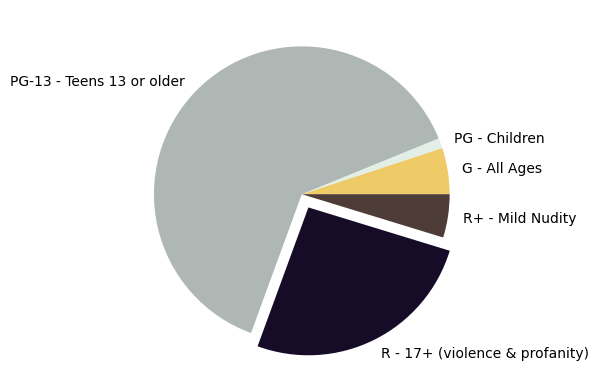

In [42]:
explode = (0, 0, 0, 0.1, 0)
colors = ['#EFCB68','#E1EFE6','#AEB7B3','#160C28','#4D3C38']
plt.pie(ratingCount.head(10), labels = ratingCount.index, explode = explode, colors = colors)

In [24]:
typeCount = df.groupby('Type')["English"].count()
display(typeCount.head(10))

Type
Movie         212
ONA            46
OVA            77
Special        31
TV            522
TV Special     21
Name: English, dtype: int64

([<matplotlib.patches.Wedge at 0x79e1e693d450>,
 [Text(0.8920512552513574, 0.8026484647742607, 'Movie'),
  Text(-0.05889825447262478, 1.098422048039859, 'ONA'),
  Text(-0.5066584472108501, 0.9763694064594048, 'OVA'),
  Text(-0.8278065946322721, 0.7243868040510686, 'Special'),
  Text(-0.4064211910934562, -1.0221652583756584, 'TV'),
  Text(1.0971041065120921, -0.07976577884221113, 'TV Special')])

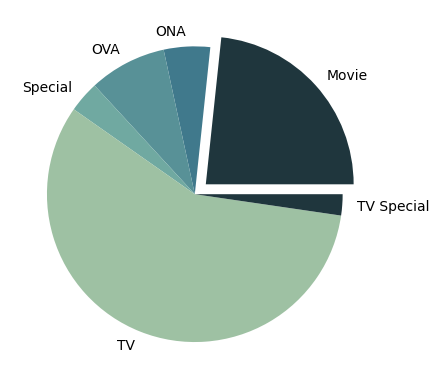

In [25]:
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['#1F363D','#40798C','#589197','#70A9A1','#9EC1A3']
plt.pie(typeCount.head(10), labels = typeCount.index, explode = explode, colors = colors)

In [26]:
sourceCount = df['Source'].value_counts()
display(sourceCount.head(10))

Source
Manga           536
Original        139
Light novel     103
Novel            55
Visual novel     22
Web manga        21
Web novel        10
4-koma manga      9
Game              6
Other             3
Name: count, dtype: int64

In [27]:
df['Genres'] = df['Genres'].str.split(',').str[0]


In [28]:
genreCount = df['Genres'].value_counts()
display(genreCount.head(22))


Genres
ActionAction                  365
ComedyComedy                  111
DramaDrama                    100
AdventureAdventure             94
ShounenShounen                 85
SeinenSeinen                   43
Award WinningAward Winning     38
FantasyFantasy                 14
Slice of LifeSlice of Life     11
MysteryMystery                  9
JoseiJosei                      6
HorrorHorror                    6
Boys LoveBoys Love              5
Sci-FiSci-Fi                    5
Avant GardeAvant Garde          5
ShoujoShoujo                    4
GourmetGourmet                  4
SportsSports                    1
SupernaturalSupernatural        1
KidsKids                        1
RomanceRomance                  1
Name: count, dtype: int64

In [29]:
df["Genres"] = df["Genres"].replace("ShounenShounen", "AdventureAdventure")
df["Genres"] = df["Genres"].replace("SeinenSeinen", "ActionAction")
df["Genres"] = df["Genres"].replace("JoseiJosei", "RomanceRomance")
df["Genres"] = df["Genres"].replace("ShoujoShoujo", "RomanceRomance")
df["Genres"] = df["Genres"].replace("SupernaturalSupernatural", "AdventureAdventure")
df["Genres"] = df["Genres"].replace("HorrorHorror", "MysteryMystery")

Cosine Sim


In [43]:
tfidf = TfidfVectorizer(stop_words='english')

In [47]:

tfidf_matrix = tfidf.fit_transform(df['Description'])


In [48]:
df.columns

Index(['Score', 'Popularity', 'Description', 'English', 'Type', 'Episodes',
       'Aired', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Rating', 'Year'],
      dtype='object')

In [50]:
tfidf_matrix

<909x13354 sparse matrix of type '<class 'numpy.float64'>'
	with 59072 stored elements in Compressed Sparse Row format>

In [51]:
cosineSim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [52]:
cosineSim

array([[1.        , 0.03002543, 0.02017435, ..., 0.01670703, 0.        ,
        0.02205846],
       [0.03002543, 1.        , 0.00332102, ..., 0.02026291, 0.00218842,
        0.0099515 ],
       [0.02017435, 0.00332102, 1.        , ..., 0.00679396, 0.        ,
        0.01136736],
       ...,
       [0.01670703, 0.02026291, 0.00679396, ..., 1.        , 0.05405735,
        0.01485315],
       [0.        , 0.00218842, 0.        , ..., 0.05405735, 1.        ,
        0.        ],
       [0.02205846, 0.0099515 , 0.01136736, ..., 0.01485315, 0.        ,
        1.        ]])

In [53]:
indices = pd.Series(df.index, index=df['English'])

In [54]:
indices

English
Frieren: Beyond Journey's End                            0
Fullmetal Alchemist: Brotherhood                         1
Steins;Gate                                              2
Gintama Season 4                                         3
Attack on Titan Season 3 Part 2                          4
                                                      ... 
Macross Frontier: The False Songstress                 995
マギ シンドバッドの冒険                                           996
Detective Conan Movie 09: Strategy Above the Depths    997
Detective Conan Movie 12: Full Score of Fear           998
Initial D Legend 1 Awakening                           999
Length: 909, dtype: int64

## KNN for Genre classification based on description

In [60]:
X = cosineSim
y = df.Rating



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

# Train classifier
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.6813186813186813


## Naive Bayes for Rating classification based on description

In [ ]:
X = cosineSim
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73        59
           1       0.89      0.76      0.82        21
           2       0.18      0.67      0.29         3
           3       0.33      0.33      0.33         3
           4       0.14      0.60      0.22         5

    accuracy                           0.63        91
   macro avg       0.50      0.59      0.48        91
weighted avg       0.84      0.63      0.69        91



## Logistic Regression to improve accuracy in the previous model


In [80]:
X = cosineSim
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

labelEncoder = LabelEncoder()
yEncoded = labelEncoder.fit_transform(y)

logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0)
logmodel = logmodel.fit(X_train, y_train)

In [81]:
y_pred = logmodel.predict(X_test)

In [82]:
print(classification_report(y, logmodel.predict(X)))

                                precision    recall  f1-score   support

                  G - All Ages       1.00      0.13      0.23        46
                 PG - Children       1.00      0.20      0.33        10
     PG-13 - Teens 13 or older       0.82      0.99      0.90       575
R - 17+ (violence & profanity)       0.95      0.81      0.88       235
              R+ - Mild Nudity       1.00      0.09      0.17        43

                      accuracy                           0.85       909
                     macro avg       0.95      0.45      0.50       909
                  weighted avg       0.87      0.85      0.82       909



In [4]:
pip install lazypredict

In [55]:
from lazypredict.Supervised import LazyClassifier